In [1]:
# Import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob

# Re-size all the images to this size
IMAGE_SIZE = [224, 224]

# Relative paths for train and validation datasets
train_path = '../Datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../Datasets/New Plant Diseases Dataset(Augmented)/valid'

# Load ResNet50 pre-trained model
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [2]:
# Freeze the existing weights
for layer in resnet.layers:
    layer.trainable = False

# Useful for getting the number of output classes
folders = glob(train_path + '/*')

# Add our custom layers
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model object
model = Model(inputs=resnet.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [3]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Data preprocessing for the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [5]:
# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Epoch 1/10
574/574 [==============================] - 2776s 5s/step - loss: 2.3534 - accuracy: 0.3286 - val_loss: 1.8875 - val_accuracy: 0.3926
Epoch 2/10
574/574 [==============================] - 3144s 5s/step - loss: 1.7910 - accuracy: 0.4582 - val_loss: 2.9746 - val_accuracy: 0.3348
Epoch 3/10
574/574 [==============================] - 3719s 6s/step - loss: 1.7784 - accuracy: 0.4932 - val_loss: 1.6893 - val_accuracy: 0.5230
Epoch 4/10
574/574 [==============================] - 3991s 7s/step - loss: 1.7374 - accuracy: 0.5137 - val_loss: 1.9659 - val_accuracy: 0.5716
Epoch 5/10
574/574 [==============================] - 3248s 6s/step - loss: 1.6344 - accuracy: 0.5378 - val_loss: 2.3084 - val_accuracy: 0.4517
Epoch 6/10
574/574 [==============================] - 3058s 5s/step - loss: 1.5617 - accuracy: 0.5584 - val_loss: 2.4783 - val_accuracy: 0.5071
Epoch 7/10
574/574 [==============================] - 2888s 5s/step - loss: 1.5935 - accuracy: 0.5581 - val_loss: 1.6063 - val_accuracy:

In [6]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

144/144 [==============================] - 622s 4s/step - loss: 1.4720 - accuracy: 0.6164
Validation Loss: 1.472020149230957
Validation Accuracy: 0.616357684135437


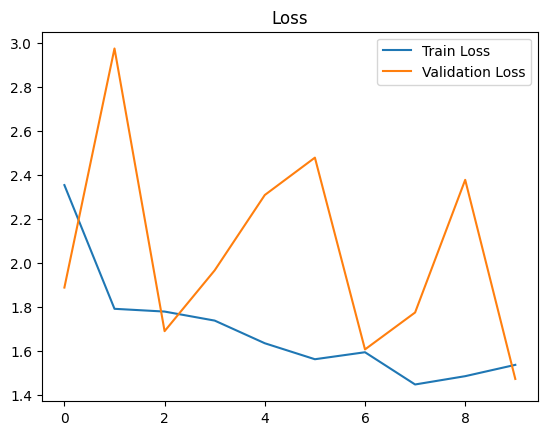

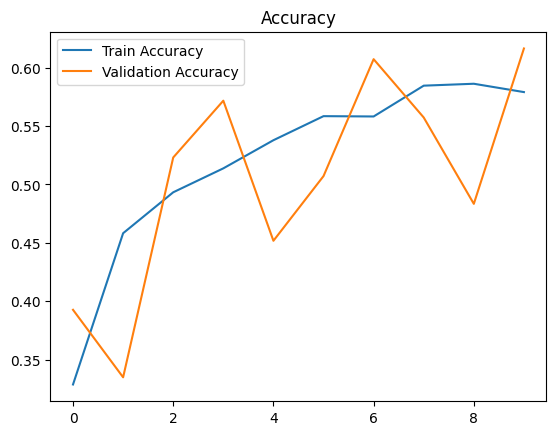

In [7]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


In [10]:
model.save('../Models/ResNet_model.h5')